## Analise emocional de tweets com keras

### Pré-processamento e analise exploratoria

In [1]:
#principais bibliotecas
import numpy as np 
import pandas as pd 
import re
import string

In [2]:
#importação do texto
train_df = pd.read_csv("train.csv")

In [3]:
train_df[train_df.target==1].head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df[train_df.target==0].head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### Vetorização do texto

In [6]:
#importaçao da ntlk

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\netoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\netoc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#função que limpa o texto
def clean_text(text):
    stemmer = PorterStemmer()

    text_l = text.lower()
    text_l_nn = re.sub(r'\d+', '', text_l)
    text_l_nn_np = text_l_nn.translate(
        str.maketrans('', '', string.punctuation)).strip()
    stop_words = set(stopwords.words('english'))
    stop_words.add('û')
    stop_words.add('u')
    stop_words.add('im')
    tokens = word_tokenize(text_l_nn_np)
    result = " ".join([stemmer.stem(i) for i in tokens if not i in stop_words])
    return result

In [8]:
#text=train_df['text']
#keyword=train_df.keyword.fillna('')
#bigstring=text+' '+keyword
train_df['text_processed'] = train_df['text'].map(lambda x: clean_text(x)) 

In [9]:
train_df[train_df.target==1].head()

,id,keyword,location,text,target,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [10]:
train_df[train_df.target==0].head()

,id,keyword,location,text,target,text_processed
15,23,NaN,NaN,What's up man?,0,what man
16,24,NaN,NaN,I love fruits,0,love fruit
17,25,NaN,NaN,Summer is lovely,0,summer love
18,26,NaN,NaN,My car is so fast,0,car fast
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,goooooooaaaaaal


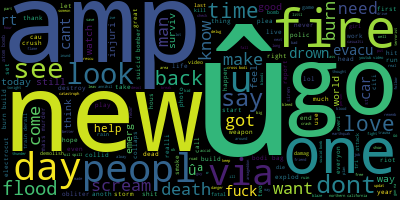

In [11]:
import wordcloud
# Join the different processed titles together.
long_string = ' '.join(train_df.text_processed)

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [31]:

# Python program to find the k most frequent words
# from data set
from collections import Counter
  
data_set = ' '.join(train_df[train_df.target==1].text_processed)
  
# split() returns list of all the words in the string
split_it = data_set.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(10)
  
print(most_occur)

[('fire', 267), ('bomb', 181), ('kill', 158), ('news', 140), ('via', 121), ('flood', 120), ('disast', 118), ('california', 115), ('crash', 112), ('suicid', 110)]


### Classificação  usando clf e tdif

In [13]:
#importar bibliotecas do sklearn
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [14]:
#usando count vectorizer

count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_df["text_processed"])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=4, scoring="f1")
scores.mean()

0.5669011258698067

In [15]:
#usando count vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

train_vectors = tfidf_vectorizer.fit_transform(train_df["text_processed"])
clf = linear_model.RidgeClassifier()

scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=4, scoring="f1")
scores.mean()

0.6037799819166425

### Classificação usando keras e Tensorflow

In [16]:
#importar bibliotecas keras

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.backend import clear_session
from keras.preprocessing import sequence

In [17]:
#separação entre teste e treino
from sklearn.model_selection import train_test_split
X_train,  X_test,y_train, y_test=train_test_split(train_vectors.toarray(), train_df["target"],test_size=0.2)


In [18]:
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                276825    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 276,841
Trainable params: 276,841
Non-trainable params: 0
_________________________________________________________________


In [19]:
#teste do modelo
history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=False, 
                    validation_data=(X_test, y_test))

In [20]:
#avaliação dos resultados
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9278
Testing Accuracy:  0.8168


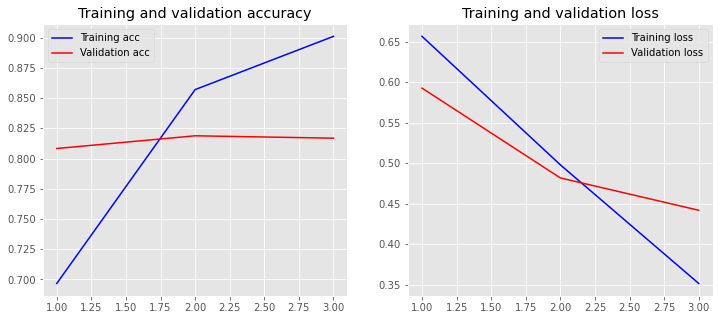

In [21]:
#ploting das epocas
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    
plot_history(history)

In [279]:
clear_session()

### Submissão de arquivo para o Kaggle

In [22]:
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [23]:
test_df['text_processed'] = test_df['text'].map(lambda x: clean_text(x))
test_vectors = tfidf_vectorizer.transform(test_df["text_processed"])

In [24]:
preds=np.rint(model.predict(test_vectors.toarray())).astype('int64')
preds.astype('int64')
sample_submission["target"] = [i[0] for i in preds]

In [25]:
sample_submission.target.mean()

0.3466135458167331

In [26]:
sample_submission.drop(['Unnamed: 0'], inplace=True, axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [28]:
sample_submission.to_csv("sample_submission.csv", index=False)

In [29]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
